<a href="https://colab.research.google.com/github/PodevynLoris/Mobile_robot_simulator/blob/main/Copie_de_07_1_ANLP_Word_Embeddings_2025_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Start by copying this into your Google Drive!!

Maastricht_University_logo.svg

# Advanced Natural Language Processing Course - Tutorial Word Embeddings
Author: Jan Scholtes en Gijs Wijngaard






---

Version 2025-2026.1

---

Welcome to the tutorial about Word Embeddings, a key component of Deep-Learning NLP applications. In this notebook you will work with Word2Vec models, and we finish off with transformers and sentence transformers.

We will also discuss several limitations of Word Embeddings. Like tokenization errors, wrong use of word embeddings will propagate through the entire NLP pipeline and negatively influence the performance of your model.

There are many sources of possible errors:
- Wrong language (do not overestimate multi-language claims)
- Wrong character set (missing characters)
- Wrong tokenization leading to unknown or corrupted tokens for which no embeddings exist or that cannot be dealt with sub-words
- No relevant context for sub-word embeddings
- Missing embeddings for chemical formulas, DNA/RNA, abbreviations, etc  
- Missing embeddings in general (out of vocabulairy errors) and limited sub-words
- Bias in embeddings
- ....

One can state  that there are many ways to do this wrong and a few ways to do it right! In this tutorial we will look at a few of these problems and how to address them.


---

## Word2Vec
In this section, we will focus on word representations. We will train a Word2Vec model from scratch, by using the same dataset as before. In this way, we try to compare the two datasets and see if we can find differences between words in a negative setting vs words in a positive setting.

Word2Vec learns its word embeddings by looking inside the documents and checking the nearby words. The core idea behind this is that similar words are nearby in a sentence.
The most common implementation for Word2Vec in Python is the one by [gensim](https://radimrehurek.com/gensim/models/word2vec.html). We can compute the embeddings by passing our documents as sentences to the model. Then to get an embedding, we just index the models word vectors with our needed embedding:

In [1]:
import nltk
nltk.download('movie_reviews')
nltk.download('words')
from nltk.corpus import words, movie_reviews as mr
nltk_words = set(words.words())
import string
from collections import Counter
def remove_punct(word):
    word = word.translate(str.maketrans('', '', string.punctuation))
    return word if word in nltk_words else ''
all_words = Counter(filter(remove_punct, mr.words()))
all_words.most_common(10)

documents = [(list(filter(remove_punct, mr.words(f))), mr.categories(f)) for f in mr.fileids()]
print("Total number of documents:", len(documents))
print("Total number of words in first document:", len(documents[0][0]))


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Total number of documents: 2000
Total number of words in first document: 636


In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 44.7 MB/s eta 0:00:00


In [3]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=[doc for doc, cat in documents])
word_vectors = model.wv
print(word_vectors['the'])
print("dimensionality word vectors:"+ str(word_vectors['the'].shape))
print("Size of vocabulary: " + str(len(word_vectors.key_to_index)))

[-0.5522443  -0.13742259  0.09947208  1.5699644  -1.2344669  -0.06807288
  1.6641433   0.6498785  -0.5918337  -0.7387452   1.4826738   0.18663965
 -0.44883668 -0.9348042  -0.32680395 -0.3974978   0.52254856  0.03621123
  0.09491613 -0.09040212  1.0144138   1.099094    0.71460897  0.06468274
  0.62637097  0.37781587 -0.09543822  0.48243627 -0.8401514  -1.1482542
 -0.77793086 -0.26195037  1.4091332  -0.6487994  -0.4731541   0.11063328
  1.3974323  -1.035142    0.08992957 -0.30406642 -0.3901012   0.5478166
 -0.24226014 -0.72329545  0.41184935 -0.03393403  0.1339418  -0.08504018
  0.1716845   1.1997762  -0.15362681 -0.28270724 -0.07802309  0.02264688
  0.27607438 -0.9666065   0.2614394  -0.08650124 -0.17674978  1.0206206
 -0.39070353 -0.2446024  -0.2113446  -0.7372025   0.63468707 -0.1202637
 -1.0387723  -0.9968367  -0.80918705  0.64835614 -0.66580987 -0.25513953
  0.84821725 -0.6867058   0.48175254  0.0667276   0.50068676  0.7534286
 -0.6772117  -0.6438869   0.3094511   0.9958893   0.4368

We can find the most similar vector nearby a word using `most_similar`.

In [4]:
word_vectors.most_similar('king')

[('former', 0.8539438247680664),
 ('jean', 0.8467180132865906),
 ('captain', 0.841401994228363),
 ('l', 0.8292824029922485),
 ('queen', 0.8262972831726074),
 ('producer', 0.8241720795631409),
 ('fellow', 0.8186790347099304),
 ('openly', 0.8147789835929871),
 ('manager', 0.8145919442176819),
 ('buddy', 0.813575804233551)]

And we can even do arithmetic with it. The most famous example of this is the `king + man - woman = queen` analogy. By adding the vector of king and man to each other, and subtracting the vector of woman, we should get the queen vector. Lets try!

In [5]:
word_vectors.most_similar(positive=['king','woman'],negative=['man'])

[('queen', 0.8245822787284851),
 ('manager', 0.7879325151443481),
 ('sister', 0.7876057028770447),
 ('domineering', 0.7836568355560303),
 ('kelly', 0.7814540863037109),
 ('lady', 0.7764091491699219),
 ('aunt', 0.769263505935669),
 ('jean', 0.7689275145530701),
 ('jane', 0.7670547962188721),
 ('appearance', 0.7662686109542847)]

We get queen as the second most similar vector. We only trained our word2vec model on our reviews dataset which is a small dataset for word2vec standards, so that makes sense.

Lastly, lets plot the data. For this, we need to represent our vectors as a 2-d space. For this, we need a dimensionality reduction technique, such as PCA or t-SNE. We use t-SNE (invented by someone who did the same master as you are doing!). It might take a while to compute the vectors below:

In [6]:
from sklearn.manifold import TSNE
import numpy as np
tsne = TSNE(n_components=2, random_state=0)
vectors = tsne.fit_transform(np.asarray(model.wv.vectors))
x, y = zip(*vectors)

In [7]:
len(x), len(y)

(8798, 8798)

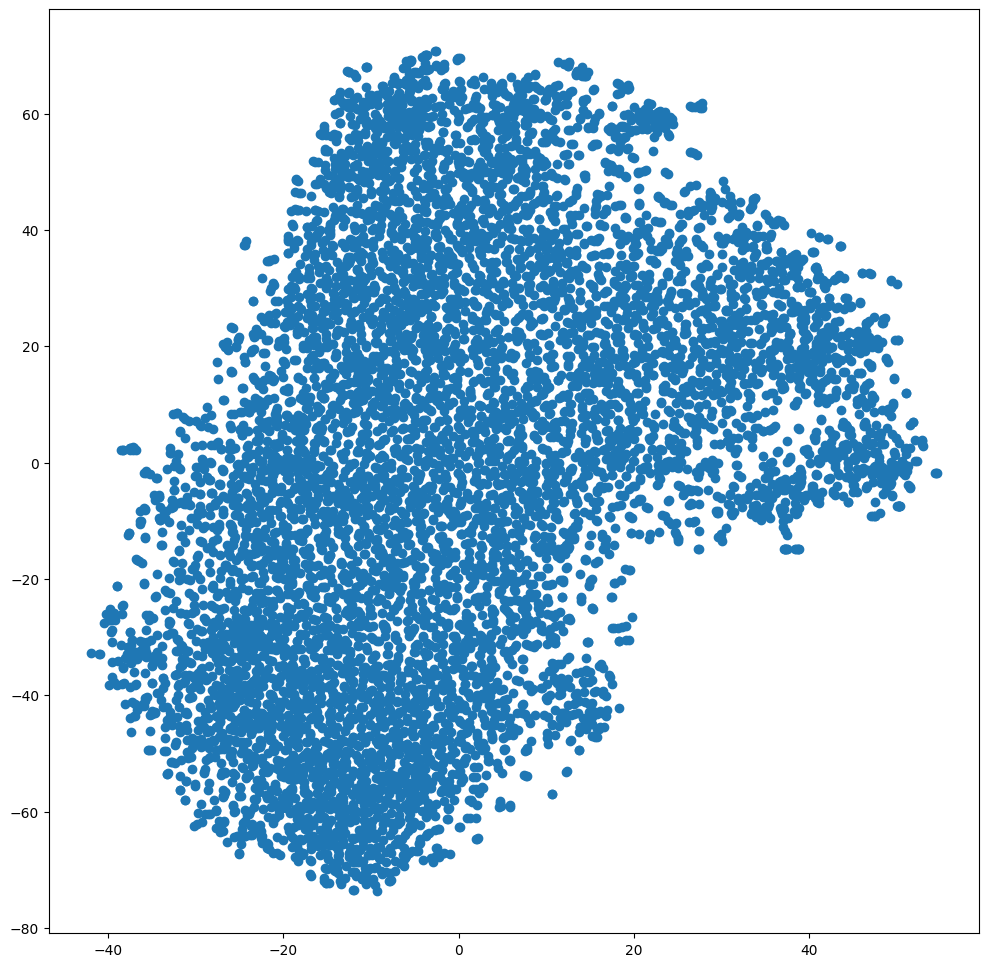

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
plt.scatter(x, y)

t-SNE (t-distributed Stochastic Neighbor Embedding) was introduced by Laurens van der Maaten and Geoffrey Hinton.

It was published in the paper:

Laurens van der Maaten and Geoffrey Hinton. “Visualizing Data using t-SNE.” Journal of Machine Learning Research (JMLR), 2008.

Laurens van der Maaten is Dutch and did his academic training in the Netherlands:

🎓 M.Sc. in Artificial Intelligence – Maastricht University

🎓 Ph.D. in Computer Science – Tilburg University (Netherlands)

After his PhD he worked as a postdoctoral researcher at Delft University of Technology, then moved to Microsoft Research and later to Facebook AI Research (FAIR), where he became well known in the machine learning and computer vision community.

## Pretrained Word2Vec
Word2Vec actually works best when using a pretrained word vectors. This means that we would not put in data in the model to train a good representation, but we rely on external researchers that have already trained such a system on so much data the word vectors have a good representation already.

We now will use glove vectors. We can import such model like so. It might take a while to download them.

In [9]:
import gensim.downloader
glove = gensim.downloader.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [10]:
glove["king"]

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ], dtype=float32)

### Exercise 1: Limitations of basic Word Embeddings such as Word2Vec and Glove

Using all our `documents`, get the `glove` pretrained word vector for every word, take the average over all word vectors for each document.

Here is the code to do that.

In [11]:
document_vectors = []
for doc, cat in documents:
    word_vectors_for_doc = []
    for word in doc:
        try:
            # Get the glove vector for the word
            vector = glove[word]
            word_vectors_for_doc.append(vector)
        except KeyError:
            # Handle words not in the glove vocabulary (skip or use a zero vector)
            pass  # Skipping words not in vocabulary

    if word_vectors_for_doc:
        # Calculate the average vector for the document
        avg_vector = np.mean(word_vectors_for_doc, axis=0)
        document_vectors.append((avg_vector, cat))
    else:
        # Handle empty documents after removing words not in vocabulary
        pass # Skipping empty documents

print("Number of documents with average vectors:", len(document_vectors))
# You can now use document_vectors for further analysis

Number of documents with average vectors: 2000


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Take a few pairs of document vectors and calculate cosine similarity
# For example, comparing the first two documents
if len(document_vectors) >= 2:
    vec1 = document_vectors[0][0]
    vec2 = document_vectors[1][0]
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    print(f"Cosine similarity between document 1 and document 2: {similarity}")

# You can compare other pairs as well
if len(document_vectors) >= 10 and len(document_vectors) < 2000:
    vec_pos = document_vectors[0][0] # Assuming the first document is from a positive review
    vec_neg = document_vectors[1000][0] # Assuming the 1001th document is from a negative review
    similarity_pos_neg = cosine_similarity([vec_pos], [vec_neg])[0][0]
    print(f"Cosine similarity between a positive and a negative review document: {similarity_pos_neg}")
elif len(document_vectors) >= 2000:
    vec_pos = document_vectors[0][0] # Assuming the first document is from a positive review
    vec_neg = document_vectors[1000][0] # Assuming the 1001th document is from a negative review
    similarity_pos_neg = cosine_similarity([vec_pos], [vec_neg])[0][0]
    print(f"Cosine similarity between a positive and a negative review document: {similarity_pos_neg}")
else:
    print("Not enough documents to compare positive and negative reviews.")

Cosine similarity between document 1 and document 2: 0.9955000281333923
Cosine similarity between a positive and a negative review document: 0.9965034127235413


As you see: The cosine similarity is close to 1 for all documents because we calculated the average of all word vectors within each document. When you average many vectors, especially in longer documents, the resulting average vector tends to point in a similar general direction in the vector space, regardless of the specific nuances of the document's content. This is because the most frequent words in the dataset have a large influence on the average, making the document vectors converge towards a similar central point in the embedding space. This highlights one of the limitations of simply averaging word embeddings to represent documents.

# More Questions:

1a. Do the vectors differ a lot?

1b. When one has a number of very long documents, what will the vectors average to?

1c. Do you think this is a usefull representation of a document when using a task such as text classification?

1d. What kind of errors will you observe when a Word2Vec or Glove model for English is used on German?

1e. What will happen when certain tokens do not have an embedding in Word2Vec or Glove?  

## Bias in Word2Vec
One of the problems with Word2Vec (and with machine learning in general) is that there is lots of biases assumed by the model. Examples of biases that can be harmful when using these algorithms include gender bias and ethnicity bias. Lets check for example what happens if we take the female equivalent of `doctor`:

In [13]:
glove.most_similar(positive=['doctor','woman'],negative=['man'])

[('nurse', 0.8404642939567566),
 ('child', 0.7663259506225586),
 ('pregnant', 0.7570130228996277),
 ('mother', 0.7517457604408264),
 ('patient', 0.7516663074493408),
 ('physician', 0.7507280707359314),
 ('dentist', 0.7360344529151917),
 ('therapist', 0.7342537045478821),
 ('parents', 0.7286345958709717),
 ('surgeon', 0.7165213823318481)]

### Exercise 2: Bias in Word2Vec

Here are other examples of bias in Glove and in Word2Vec.

In [14]:
glove.most_similar(positive=['programmer','woman'],negative=['man'])

[('prodigy', 0.6731117367744446),
 ('therapist', 0.6414065361022949),
 ('psychotherapist', 0.6201493144035339),
 ('technician', 0.6191534996032715),
 ('programmers', 0.59874427318573),
 ('educator', 0.5932906866073608),
 ('psychologist', 0.5907979607582092),
 ('installer', 0.5891358852386475),
 ('acrobat', 0.5890737771987915),
 ('indian-american', 0.5828383564949036)]

In [15]:
glove.most_similar(positive=['soldier','woman'],negative=['man'])


[('serviceman', 0.7734532952308655),
 ('policeman', 0.7336082458496094),
 ('wounded', 0.7244912385940552),
 ('servicemen', 0.7241289615631104),
 ('girl', 0.7200008034706116),
 ('slain', 0.686198353767395),
 ('soldiers', 0.6837711930274963),
 ('abducted', 0.6763466000556946),
 ('schoolgirl', 0.6693770885467529),
 ('nurse', 0.6690511107444763)]

In [16]:
glove.most_similar(positive=['professor','woman'],negative=['man'])

[('psychologist', 0.819978654384613),
 ('sociology', 0.8027474284172058),
 ('anthropology', 0.7872475385665894),
 ('researcher', 0.7831952571868896),
 ('ph.d.', 0.7789674401283264),
 ('lecturer', 0.7618552446365356),
 ('harvard', 0.7611184120178223),
 ('sociologist', 0.7599681615829468),
 ('psychology', 0.7588158845901489),
 ('anthropologist', 0.7562189698219299)]

## Transformers

We arrive at the state-of-the-art, Transformers models!

Several (not all) of the problems observed in Word2Vec and Glove are addressed with the word embeddings in the Transformer model and in BERT in particular. The most important one being that so-called homonyms will get different embeddings based ont he context of a word in a sentence.

Although in another course we go deeper into Transformers itself, in this section we will go through representing our dataset as vectors. We do this again with the use of a pretrained model, for example BERT. We use the `transformers` library from HuggingFace to download the model, and use it on our data. Lets install the library first and import the model.

In this section we will use Sentence Transformers library, which is a popular way of calculating embeddings for sentences using transformer models. See the documentation of the library [here](https://www.sbert.net/).
In essence, this library basically also uses BERT-based models, but uses a mean pooling algorithm to average the embeddings out over its tokens. Its also more efficient, it would take some time using BERT to compute all the embeddings for every document in our reviews dataset, Sentence Transformers is optimized to do such task.

We start with downloading the library using `pip` and importing a model.

In [17]:
!pip install -qq sentence-transformers
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

We can encode any sentence like this:

In [18]:
sentence_embedding = sentence_model.encode("the quick brown fox jumps over the lazy dog")
sentence_embedding.shape

(384,)

We now get a vector of 384 instead of a matrix of 11 by 768. This makes it much easier to deal with.

## BERT Models
In this section, we will learn how to extract embeddings from the pre-trained BERT. Consider the sentence 'I love Maastricht'. Let's see how to obtain the contextualized word embedding of all the words in the sentence using the pre-trained BERT model with Hugging Face's transformer library.

In [19]:
!pip install -qq transformers[torch] datasets

Lets make sure we get the same results every time we run the same code in the notebook (reproducability). We can do this by setting the seeds of the packages we use. Like this:

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

## Vocabulary and Tokenizers

We can tokenize a piece of text by importing the tokenizer from the `transformers` library. Then to tokenize we use the `tokenize()` function. This function splits the texts based on the items in the vocabulary.

Lets consider the `HuggingFace` library. We can check all the available pre-trained models [here](https://huggingface.co/models). For BERT, these models we can filter down on the `bert` [tag](https://huggingface.co/models?other=bert). For now, we use the [bert-base-uncased](https://huggingface.co/bert-base-uncased) model. As the name suggests, it a BERT with 12 encoders and it is trained with uncased tokens. The representation size will be 768. The `uncased` means that we have only lowercase letters in our tokenizer.

We can download and load the pretrained model like this. Lets look how the model is implemented. Can you notice the 12 layers/encoders of the model? Also notice the different type of inputs we have in the embedding layer. The word embedding, that converts the token ids we have (30522 of them) into 768. Same holds for the position embeddings and the token_type_embeddings we could put in.

In [21]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
model = BertModel.from_pretrained('bert-base-uncased')
model

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

## Preprocessing the input
Define the sentence:

In [23]:
sentence = 'I love AI'

Tokenize the sentence and obtain the tokens:

In [24]:
tokens = tokenizer.tokenize(sentence)

Let's print the tokens:

In [25]:
print(tokens)

['i', 'love', 'ai']


**The [CLS] and [SEP] tokens:**

[CLS] (classification token):
A special token added at the beginning of every input sequence.

During pre-training, BERT learns to use the hidden state at the [CLS] position to represent the entire sequence.

For classification tasks (e.g., sentiment, NLI, topic detection), the final hidden state of [CLS] is passed to a classifier head.

[SEP] (separator token):
Marks the end of a single sequence or the boundary between two sequences.

Used in tasks with sentence pairs (e.g., question + passage, entailment).

Even for single sentences, BERT expects a [SEP] to indicate sequence end because it was trained that way.

**Why it’s needed**

Matches pre-training format
BERT was trained on inputs like:

[CLS] sentence A tokens [SEP] sentence B tokens [SEP]


If you don’t insert these tokens, the input format won’t match what the model learned, and performance drops.

Provides a fixed “sequence embedding”
The [CLS] token’s final hidden vector
ℎ
[CLS]
h
[CLS]
	​

 acts as a compact embedding for the entire sequence — the classifier head expects it.

Helps with segment information
The [SEP] token signals where one sequence ends and the next begins, enabling the model to learn relationships (e.g., in entailment tasks).

Maintains compatibility with position and segment embeddings
BERT adds token type embeddings (segment A vs B) and positional encodings; [CLS] and [SEP] help define these boundaries.

You must add [CLS] and [SEP] because BERT’s encoder and downstream heads were trained to expect them.
[CLS] provides a pooled representation for classification tasks, and [SEP] clearly signals sequence boundaries — critical for pair tasks and general consistency.

Now, we will add the `[CLS]` token at the beginning and `[SEP]` token at the end of the tokens list:

In [26]:
tokens = ['[CLS]'] + tokens + ['[SEP]']

Let's look at our updated tokens list:

In [27]:
print(tokens)

['[CLS]', 'i', 'love', 'ai', '[SEP]']


As we can observe, we have `[CLS]` token at the beginning and sep token at the end of our tokens list. We can also observe that length of our tokens is 5.

Say, we need to keep the length of our tokens list to 7, then, in that case, we will add two `[PAD]` tokens at the end as shown in the following:



In [28]:
tokens = tokens + ['[PAD]'] + ['[PAD]']

Let's print our updated tokens list:

In [29]:
print(tokens)

['[CLS]', 'i', 'love', 'ai', '[SEP]', '[PAD]', '[PAD]']


**Masking**

Masking is a technique used in Transformer-based models (like BERT) where some input tokens are hidden (masked) during training so the model must predict them from context. Masking is a pre-training trick where some tokens are hidden and the model learns to recover them, forcing it to understand surrounding context and build strong word and sentence representations.



As we can observe, now we have the tokens list consists of `[PAD]` tokens and the length of our tokens list is 7.

Next, we create the attention mask. The attention mask is there to let the model know which items should be taken into account when calculating the attentions. Since `[PAD]` tokens are just to pad the string and do not have any semantic meaning, we should let the model know not to take them into account.

We set the attention mask value to 1 if the token is not a `[PAD]` token else we will set the attention mask to 0 as shown below:



In [30]:
attention_mask1 = [1 if i!= '[PAD]' else 0 for i in tokens]

Let's print the attention_mask:

In [31]:
print(attention_mask1)

[1, 1, 1, 1, 1, 0, 0]



As we can observe, we have attention mask values 0 at the position where have `[PAD]` token and 1 at other positions.

Next, we convert all the tokens to their token_ids as shown below:


In [32]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)


Let's have a look at the token_ids:

In [33]:
print(token_ids)

[101, 1045, 2293, 9932, 102, 0, 0]



From the above output, we can observe that each token is mapped to a unique token id.

Now, we convert the token_ids and attention_mask to tensors as shown below:

In [34]:
token_ids = torch.tensor(token_ids).unsqueeze(0)
attention_mask1 = torch.tensor(attention_mask1).unsqueeze(0)


That's it. Next, we feed the token_ids and attention_mask to the pre-trained BERT model and get the embedding.

## Getting the embedding

As shown in the following code, we feed the token_ids, and attention_mask to the model and get the output of the model:

In [35]:
print(token_ids)
print(attention_mask1)
last_hidden_state, pooler_output = model(token_ids, attention_mask = attention_mask1).to_tuple()

tensor([[ 101, 1045, 2293, 9932,  102,    0,    0]])
tensor([[1, 1, 1, 1, 1, 0, 0]])


This output contains two keys or more keys, depending on the task at hand. In the case of `bert-base-uncased`, we get

In [36]:
last_hidden_state.shape, pooler_output.shape

(torch.Size([1, 7, 768]), torch.Size([1, 768]))

The `pooler_output` is basically the `last_hidden_state`'s `[CLS]` token through the pooling module (linear layer + activation) at the end:

In [37]:
torch.allclose(pooler_output, model.pooler(last_hidden_state))

True

The size `[1,7,768]` indicates the `[batch_size, sequence_length, hidden_size]`.

Our batch size is 1, the sequence length is the token length, since we have 7 tokens, the sequence length is 7, and the hidden size is the representation (embedding) size and it is 768 for the BERT-base model.

We can obtain the representation of each token as:

- `output.last_hidden_state[0][0]` gives the representation of the first token which is `[CLS]`
- `output.last_hidden_state[0][1]` gives the representation of the second token which is 'I'
- `output.last_hidden_state[0][2]` gives the representation of the third token which is 'love'.

We can also index it with `output.last_hidden_state[:, 0, :]`. In this way, we specify that we want to have the zeroth element on the second index, we get a matrix in return with both the batch size and the embedding size (since we put a colon there).

In this way, we can obtain the contextual representation of all the tokens. This is basically the contextualized word embeddings of all the words in the given sentence.

### Exercise 3: BERT Context Sensitive Embeddings

Now we will write your own code. Put the following text (the one defined under here with three times `bank` in it) to the tokenizer, add `[CLS]` and `[SEP]` values to it and pass it through the model. Get the vector representations of each of the three tokens of `bank` in the sentence and compare them.


You can see how this differs from putting the text through a GloVe/Word2Vec model as there is now way to distinguish between different meanings for a word such as 'bank'.


Putting a string with only "bank" (add `[CLS]` and `[SEP]`) without any context through the tokenizer and model wills how you that this will result in the same vectors for 'bank'. This is in the last coding example.

In [38]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Tokenize the sentence
tokens = tokenizer.tokenize(text)

# Add [CLS] and [SEP] tokens
tokens = ['[CLS]'] + tokens + ['[SEP]']

# Convert tokens to token IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)

# Convert token IDs to a tensor and add a batch dimension
token_ids = torch.tensor(token_ids).unsqueeze(0)

# Get the model output
with torch.no_grad(): # Disable gradient calculation for inference
    last_hidden_state, pooler_output = model(token_ids).to_tuple()

# Find the indices of the "bank" tokens
bank_indices = [i for i, token in enumerate(tokens) if token == 'bank']

# Get the vector representations for each "bank" token
bank_vectors = [last_hidden_state[0, i, :] for i in bank_indices]

# Print the vectors (optional)
# for i, vector in enumerate(bank_vectors):
#     print(f"Vector for 'bank' instance {i+1}: {vector}")

# You can now compare these vectors (e.g., using cosine similarity)

print(text)

from sklearn.metrics.pairwise import cosine_similarity

if len(bank_vectors) >= 2:
    similarity_1_2 = cosine_similarity(bank_vectors[0].unsqueeze(0), bank_vectors[1].unsqueeze(0))[0][0]
    print(f"Cosine similarity between the first and second 'bank': {similarity_1_2}")

if len(bank_vectors) >= 3:
    similarity_1_3 = cosine_similarity(bank_vectors[0].unsqueeze(0), bank_vectors[2].unsqueeze(0))[0][0]
    print(f"Cosine similarity between the first and third 'bank': {similarity_1_3}")
    similarity_2_3 = cosine_similarity(bank_vectors[1].unsqueeze(0), bank_vectors[2].unsqueeze(0))[0][0]
    print(f"Cosine similarity between the second and third 'bank': {similarity_2_3}")

After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.
Cosine similarity between the first and second 'bank': 0.952733039855957
Cosine similarity between the first and third 'bank': 0.6988580226898193
Cosine similarity between the second and third 'bank': 0.6978820562362671


In [39]:
# Get the vector for "bank" from the glove model
bank_vector_1 = glove["bank"]

# Access the vector for "bank" again - it will be the same
bank_vector_2 = glove["bank"]

# You can compare them to show they are identical
print(f"Are the two 'bank' vectors from Glove identical? {np.array_equal(bank_vector_1, bank_vector_2)}")

# To further illustrate, let's get vectors for "bank" in different sentences
# Note: We can't pass sentences to glove directly, only individual words.
# This limitation is what BERT overcomes. But we can show that calling glove["bank"]
# always returns the same vector.

# Even if we imagine the context, the glove vector for "bank" remains the same.
print("\nGlove vector for 'bank' (financial institution context):")
print(glove["bank"][:10]) # Print first 10 elements for brevity

print("\nGlove vector for 'bank' (river bank context):")
print(glove["bank"][:10]) # Print first 10 elements for brevity

# The vectors are the same because Glove does not consider sentence context.

Are the two 'bank' vectors from Glove identical? True

Glove vector for 'bank' (financial institution context):
[ 0.66488 -0.11391  0.67844  0.17951  0.6828  -0.47787 -0.30761  0.17489
 -0.70512 -0.55022]

Glove vector for 'bank' (river bank context):
[ 0.66488 -0.11391  0.67844  0.17951  0.6828  -0.47787 -0.30761  0.17489
 -0.70512 -0.55022]


In [40]:
# Define a sentence with only "bank"
text_isolated = "bank"

# Tokenize the sentence
tokens_isolated = tokenizer.tokenize(text_isolated)

# Add [CLS] and [SEP] tokens
tokens_isolated = ['[CLS]'] + tokens_isolated + ['[SEP]']

# Convert tokens to token IDs
token_ids_isolated = tokenizer.convert_tokens_to_ids(tokens_isolated)

# Convert token IDs to a tensor and add a batch dimension
token_ids_isolated = torch.tensor(token_ids_isolated).unsqueeze(0)

# Get the model output
with torch.no_grad(): # Disable gradient calculation for inference
    last_hidden_state_isolated, pooler_output_isolated = model(token_ids_isolated).to_tuple()

# Get the vector representation for the "bank" token
# The index for "bank" is 1 because of the [CLS] token at the beginning
bank_vector_isolated = last_hidden_state_isolated[0, 1, :]

print("Vector for 'bank' in isolation:")
# print(bank_vector_isolated) # Uncomment to print the full vector

# Now compare this vector to the contextualized vectors from the previous example (Exercise 3a)
# Assuming 'bank_vectors' from Exercise 3a is still available

if 'bank_vectors' in locals() and len(bank_vectors) >= 3:
    from sklearn.metrics.pairwise import cosine_similarity

    similarity_isolated_1 = cosine_similarity(bank_vector_isolated.unsqueeze(0), bank_vectors[0].unsqueeze(0))[0][0]
    print(f"Cosine similarity between 'bank' in isolation and the first 'bank' (vault): {similarity_isolated_1}")

    similarity_isolated_2 = cosine_similarity(bank_vector_isolated.unsqueeze(0), bank_vectors[1].unsqueeze(0))[0][0]
    print(f"Cosine similarity between 'bank' in isolation and the second 'bank' (robber): {similarity_isolated_2}")

    similarity_isolated_3 = cosine_similarity(bank_vector_isolated.unsqueeze(0), bank_vectors[2].unsqueeze(0))[0][0]
    print(f"Cosine similarity between 'bank' in isolation and the third 'bank' (river): {similarity_isolated_3}")
else:
    print("Contextualized bank vectors from Exercise 3a not found. Please run Exercise 3a code first.")

Vector for 'bank' in isolation:
Cosine similarity between 'bank' in isolation and the first 'bank' (vault): 0.3940511643886566
Cosine similarity between 'bank' in isolation and the second 'bank' (robber): 0.3831633925437927
Cosine similarity between 'bank' in isolation and the third 'bank' (river): 0.3840852975845337


# Dealing with Tokenization Problems for Chemical Formulas or RNA/DNA

In the beginning of this tutorial, we explained that there are many potenial sources of problems in Word2Vec and Glove:

- Wrong language (do not overestimate multi-language claims)
- Wrong character set (missing characters)
- Wrong tokenization leading to unknown or corrupted tokens for which no embeddings exist or that cannot be dealt with sub-words
- No relevant context for sub-word embeddings
- Missing embeddings for chemical formulas, DNA/RNA, abbreviations, etc
- Missing embeddings in general (out of vocabulairy errors) and limited sub-words
- Bias in embeddings

Language and character set detection in combination with special embeddings per language can solve the first two problems. Bias is caused by pre-training the models with text that contains various types of unwanted forms of bias.

ChemBERTa is a specialized model dealing with chemical formulas, DNABERT is a model dealing with RNA/DNA sequences. Both have specialized tokenizers, embeddings and special context embeddings derived from pre-training the models with relevant text data. BIOBERT is a good example of a BERT model specialized for Bio Medical text.

You can run the BioBERT Colab Tutorial for Medical Named Entity Recognition that can be found here: https://colab.research.google.com/github/eugenesiow/practical-ml/blob/master/notebooks/Named_Entity_Recognition_BC5CDR.ipynb



Hereunder is an exmample of a tokenization going wrong.

In [41]:
# Example 1: A made-up word that might not be in the vocabulary
text_madeup = "This is a supercalifragilisticexpialidocious word."
tokens_madeup = tokenizer.tokenize(text_madeup)
print(f"Original text: '{text_madeup}'")
print(f"Tokens: {tokens_madeup}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokens_madeup)}")
print("-" * 20)

# Example 2: A chemical formula (BERT tokenizer is not specialized for this)
text_chemical = "The formula for water is H2O."
tokens_chemical = tokenizer.tokenize(text_chemical)
print(f"Original text: '{text_chemical}'")
print(f"Tokens: {tokens_chemical}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokens_chemical)}")
print("-" * 20)

# Example 3: A string with special characters or symbols not in the vocabulary
text_symbols = "Let's analyze the data: @#$!."
tokens_symbols = tokenizer.tokenize(text_symbols)
print(f"Original text: '{text_symbols}'")
print(f"Tokens: {tokens_symbols}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokens_symbols)}")
print("-" * 20)

# Example 4: A word that might be split into unexpected sub-words
text_subword = "Analyzing the data is crucial."
tokens_subword = tokenizer.tokenize(text_subword)
print(f"Original text: '{text_subword}'")
print(f"Tokens: {tokens_subword}")
print(f"Token IDs: {tokenizer.convert_tokens_to_ids(tokens_subword)}")
print("-" * 20)

Original text: 'This is a supercalifragilisticexpialidocious word.'
Tokens: ['this', 'is', 'a', 'super', '##cal', '##if', '##rag', '##ilis', '##tic', '##ex', '##pia', '##lid', '##oc', '##ious', 'word', '.']
Token IDs: [2023, 2003, 1037, 3565, 9289, 10128, 29181, 24411, 4588, 10288, 19312, 21273, 10085, 6313, 2773, 1012]
--------------------
Original text: 'The formula for water is H2O.'
Tokens: ['the', 'formula', 'for', 'water', 'is', 'h', '##2', '##o', '.']
Token IDs: [1996, 5675, 2005, 2300, 2003, 1044, 2475, 2080, 1012]
--------------------
Original text: 'Let's analyze the data: @#$!.'
Tokens: ['let', "'", 's', 'analyze', 'the', 'data', ':', '@', '#', '$', '!', '.']
Token IDs: [2292, 1005, 1055, 17908, 1996, 2951, 1024, 1030, 1001, 1002, 999, 1012]
--------------------
Original text: 'Analyzing the data is crucial.'
Tokens: ['analyzing', 'the', 'data', 'is', 'crucial', '.']
Token IDs: [20253, 1996, 2951, 2003, 10232, 1012]
--------------------
